In [1]:
from Pysces import *

The conjugate() function will give us the complex conjugate of the wavefunction

The normalize_constant() function will give us the normalization constant, as defined in the general notation.

# Let's take some wavefunctions from Homework 2:


In [2]:
exp(x)

Let's look at what the parameters of the normalize_constant() mean:

    wavefunc: The WaveFunction/expression of interest
    var: What the integral is taken with respect to
    lower: The lower bound of the integral. If bounds are not listed, this is -oo
    upper: The upper bound of the integral. If bounds are not listed, this is oo
    
This looks like:

normalize_constant(wavefunc, var, lower, upper)

Note that in sympy notation, two "o"s (oo) represents infinity. If a bound is not given, integrate from (-oo, oo)

In [3]:
normalize_constant(exp(x), x, -oo, 0)

Again, this is the normalization constant. To get the normalized wavefunction, simply multiply the calculated normalization constant by the original wavefunction:

In [4]:
normalize_constant(exp(x), x, -oo, 0)*(exp(x))

Let's try another example over the integral (0,1)

This time let's define the function as psi for simplicity:

In [5]:
psi = a*x*(x-1)

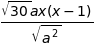

In [6]:
normalize_constant(psi, x, 0, 1)*(psi)

The same can be done with problems involving complex numbers:

In [7]:
psi = exp(I*x)

normalize_constant((psi), x, 0, L).doit()*(psi)

Let's look at the fixed gaussian wavefunction, which is called using the fixed_gaussian() function.

This function has three variables:

    alpha:alpha parameter of the gaussian
    x_0: x_0 parameter of the gaussian
    p: p parameter of the gaussian

And can be written as:

fixed_gaussian(alpha, x_0, p)

In [8]:
alpha, x_0, p = symbols("alpha, x_0, p")

FG = fixed_gaussian(alpha, x_0, p)

normalize_constant(FG, x, -oo, oo)

⎧                     1                            ⎛⎛π                        
⎪────────────────────────────────────────────  for ⎜⎜─ ≥ │arg(α)│ ∧ π > │2⋅arg
⎪    ________________________________________      ⎝⎝2                        
⎪   ╱ √π⋅(-erfc(√α⋅x₀) + 2)   √π⋅erfc(√α⋅x₀)                                  
⎪  ╱  ───────────────────── + ──────────────                                  
⎪╲╱            2⋅√α                2⋅√α                                       
⎪                                                                             
⎪                     1                                                       
⎨       ─────────────────────────────                                         
⎪               _____________________                                         
⎪              ╱ ∞                                                            
⎪             ╱  ⌠                                                            
⎪            ╱   ⎮              2                   

The above looks quite complicated, and so the "simplify()" function can be used:

In [9]:
ANS = normalize_constant(FG, x, -oo, oo)

simplify(ANS)

⎧            4 ___                                                            
⎪            ╲╱ α                   ⎛π                                        
⎪            ─────              for ⎜─ ≥ │arg(α)│ ∧ π > │2⋅arg(α) + 2⋅arg(x₀)│
⎪            4 ___                  ⎝2                                        
⎪            ╲╱ π                                                             
⎪                                                                             
⎪              1                                                              
⎪─────────────────────────────                                              ot
⎨        _____________________                                                
⎪       ╱ ∞                                                                   
⎪      ╱  ⌠                                                                   
⎪     ╱   ⎮              2                                                    
⎪    ╱    ⎮   -α⋅(x - x₀)                           

This is a bit simpler, and it is important to note that the bottom value in the piecewise function is the unsolved normalization constant. Therefore, we can use the top value as the correct constant. We can then multiply this once more by the original function to give the normalized wavefunction:

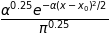

In [10]:
(alpha**(1/4)/pi**(1/4))*FG